In [392]:
#objective: predict weather using kNN learning algorithim

In [409]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [410]:
#target: type of precipitation
#features: temp_max, temp_min, wind

In [411]:
weather_df = pd.read_csv('seattle-weather.csv')
weather_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [412]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [413]:
weather_df.shape

(1461, 6)

In [414]:
weather_df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [415]:
weather_df = weather_df.drop('date', axis=1)
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


<Axes: >

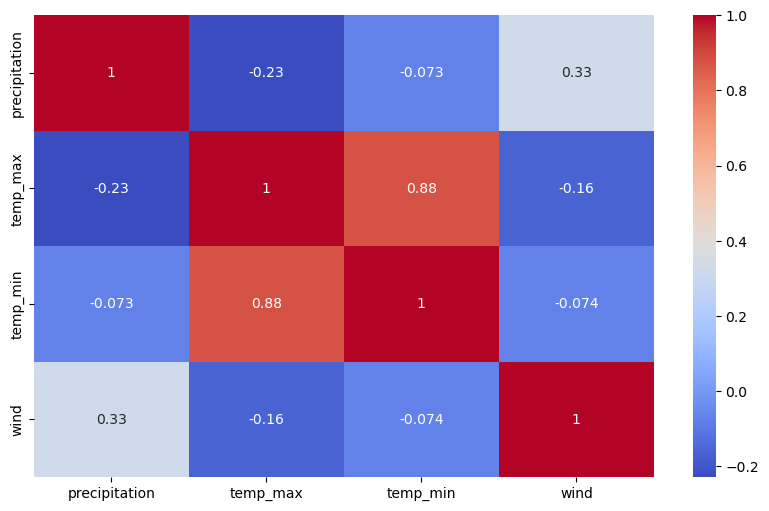

In [418]:
#correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weather_df.drop('weather', axis=1).corr(), annot=True, cmap='coolwarm')

/Users/homeacc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


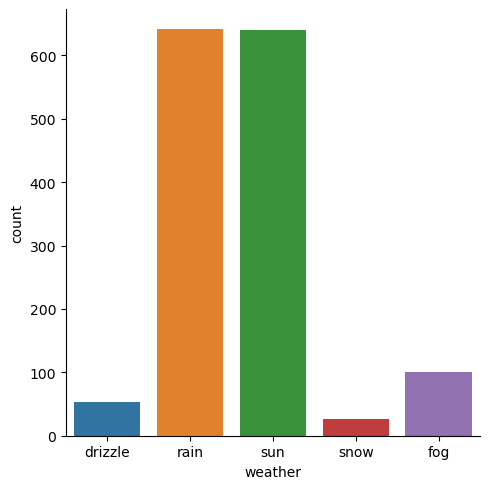

In [424]:
#distribution of weather
sns.catplot(data=weather_df, x='weather', kind='count')

In [ ]:
#precipitation values by type of precipitation
sns.catplot(data=weather_df, x='precipitation', y='weather', kind='box', orient='h', sharex=False, margin_titles=True

In [417]:
X = weather_df.drop('weather', axis=1).values

In [400]:
#add labels
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()

weather_df['class labels'] = labels.fit_transform(weather_df['weather'])
weather_df.head()

,date,precipitation,temp_max,temp_min,wind,weather,class labels
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2


In [401]:
y = weather_df['weather'].values
y

array(['drizzle', 'rain', 'rain', ..., 'fog', 'sun', 'sun'], dtype=object)

In [402]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2, shuffle=True, stratify=y)


In [403]:
#find best k value via grid search
params = {'n_neighbors': list(range(1, 100))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_k

7

In [404]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(7))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.7414965986394558

In [405]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      1.00         5
         fog       1.00      0.10      0.18        10
        rain       0.83      0.80      0.81        65
        snow       1.00      0.33      0.50         3
         sun       0.69      0.86      0.76        64

    accuracy                           0.74       147
   macro avg       0.70      0.42      0.65       147
weighted avg       0.75      0.74      0.75       147

